<a href="https://colab.research.google.com/github/bdesgarennes/NFLAnalytics-/blob/main/NFL_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NFL Player Analytics 
### Braden desGarennes & Maksim Kalmanovich
### February 2023

**Reasoning:** A very common held "fact" seen around Football and Twitter is that the QB is a football team's most valuable position and is the position that ulitmitly leads to the most wins. This can be seen, not only if you ask a fan, coach, or player but is clearly represented in the NFL's MVPs going to QBs in 46/67 times and Super Bowl MVPS going to QBs 32/57 times. We wanted to test this theory and see if the data actually backs this up or if this common belief is in fact innacurate. We looked at all games, including playoffs, from 1950 to 2021.    

**Hypothesis:** Quarterbacks have the most impact on wins on the football field.

[NFL News: Ranking each position's importance, from quarterback to returner](https://www.nfl.com/news/ranking-each-position-s-importance-from-quarterback-to-returner-0ap3000000503855)

[Football Positions Ranked by Importance](https://www.rookieroad.com/football/positions/positions-ranked-by-importance/#:~:text=The%20QB%20is%20the%20most,make%20decisions%20every%20single%20play.)

[Bleacher Report: Power Ranking the Importance of Each Position in Todays NFL](https://bleacherreport.com/articles/1659834-power-ranking-the-importance-of-each-position-in-todays-nfl)

In [ ]:
# first some initial setup of libraries we will be using
import pandas as pd # this is the main library used in python for manipulating data. 
import json # this is a library to parse json (javascript object notation)
from urllib.request import urlopen # library to read data from a URL
import matplotlib.pyplot as plt # visualization library we will use that integrates with pandas

In [ ]:
import pandas as pd

# load in NFL elo data
url="https://projects.fivethirtyeight.com/nfl-api/nfl_elo.csv"
elo_df = pd.read_csv(url)

# remove old rows
elo_df = elo_df.drop(index=range(2162))

# remove unnecessary columns
elo_df = elo_df.drop(columns=['neutral', 'importance', 'total_rating', "score1","score2"])

# make dummy var for playoff
def replace_na_with_0(val):
    if pd.isna(val):
        return 0
    else:
        return 1

elo_df['playoff'] = elo_df['playoff'].apply(replace_na_with_0)

# print first few rows of the dataframe
elo_df.head()


,date,season,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qb2_adj,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,quality
2162,1950-09-16,1950,0,PHI,CLE,1674.314,1647.304,0.629402,0.370598,1631.511,...,0.0,0.620653,0.379347,-123.09,275.22,-12.309,27.522,1630.613026,1685.827280,98.0
2163,1950-09-17,1950,0,BCL,WSH,1337.541,1454.448,0.425851,0.574149,1310.758,...,0.0,0.425357,0.574643,3.63,251.79,0.363,25.179,1310.867671,1481.487455,6.0
2164,1950-09-17,1950,0,PIT,NYG,1485.849,1461.717,0.625529,0.374471,1453.448,...,0.0,0.612587,0.387413,-34.98,-54.12,-3.498,-5.412,1454.118729,1493.988602,35.0
2165,1950-09-17,1950,0,GB,DET,1353.646,1449.128,0.456245,0.543755,1320.673,...,0.0,0.443900,0.556100,-37.62,115.17,-3.762,11.517,1322.441687,1481.661757,7.0
2166,1950-09-17,1950,0,LAR,CHI,1564.606,1628.688,0.501321,0.498679,1548.463,...,0.0,0.498518,0.501482,-12.21,-30.03,-1.221,-3.003,1549.226817,1643.798965,88.0


In [ ]:
url = "https://raw.githubusercontent.com/fivethirtyeight/nfl-elo-game/master/data/nfl_games.csv"
results_df = pd.read_csv(url)

# remove unnecessary columns
results_df = results_df.drop(columns=['elo1', 'elo2', 'elo_prob1','neutral', "playoff"])

results_df.head()

,date,season,team1,team2,score1,score2,result1
0,1920-09-26,1920,RII,STP,48,0,1.0
1,1920-10-03,1920,AKR,WHE,43,0,1.0
2,1920-10-03,1920,RCH,ABU,10,0,1.0
3,1920-10-03,1920,DAY,COL,14,0,1.0
4,1920-10-03,1920,RII,MUN,45,0,1.0


In [ ]:
merged_df = pd.merge(elo_df, results_df, on=["date", "team1", "team2", "season"])
merged_df.describe()

,season,playoff,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,...,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,quality,score1,score2,result1
count,14648.000000,14648.000000,14648.000000,14648.000000,14648.000000,14648.000000,14648.000000,14648.000000,14648.000000,14648.000000,...,14648.000000,14648.000000,14648.000000,14648.000000,14648.000000,14648.000000,14648.000000,14648.000000,14648.000000,14648.000000
mean,1990.862780,0.038435,1504.676541,1502.907499,0.582791,0.417209,1504.324673,1503.259369,1504.129467,1502.829102,...,107.854961,87.253721,96.086827,94.014281,1504.174053,1502.784516,47.980543,22.509353,19.829328,0.573833
std,18.630119,0.192251,103.283439,101.911263,0.172918,0.172918,105.761879,103.959681,100.158164,98.902529,...,133.298020,131.595488,57.771029,57.171035,102.627943,101.132417,29.356534,10.726332,10.286373,0.492027
min,1950.000000,0.000000,1153.902000,1156.551000,0.070953,0.029484,1166.933000,1153.902000,1149.699743,1152.474651,...,-385.737110,-413.971659,-46.329533,-53.778917,1164.327676,1149.699743,0.000000,0.000000,0.000000,0.000000
25%,1976.000000,0.000000,1432.083500,1432.194500,0.460660,0.285708,1430.130750,1430.436000,1433.940308,1434.312130,...,14.717080,-6.171507,53.929676,52.351545,1432.405966,1431.987497,22.000000,14.000000,13.000000,0.000000
50%,1993.000000,0.000000,1505.078500,1504.262500,0.593721,0.406279,1504.721500,1504.848500,1505.720834,1504.449776,...,104.899185,82.777687,90.507947,88.758575,1505.163207,1505.105619,48.000000,22.000000,20.000000,1.000000
75%,2007.000000,0.000000,1578.082500,1576.941500,0.714292,0.539340,1580.522750,1578.268250,1574.571897,1574.782379,...,198.561090,175.672226,131.832023,129.936851,1578.430253,1575.017243,73.000000,30.000000,27.000000,1.000000
max,2020.000000,1.000000,1839.663000,1849.484000,0.970516,0.929047,1849.484000,1831.462000,1806.390160,1814.366226,...,713.695222,605.098179,327.716545,329.562716,1814.366226,1806.223590,100.000000,72.000000,62.000000,1.000000


In [ ]:
merged_df.head()

,date,season,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,quality,score1,score2,result1
0,1950-09-16,1950,0,PHI,CLE,1674.314,1647.304,0.629402,0.370598,1631.511,...,-123.09,275.22,-12.309,27.522,1630.613026,1685.827280,98.0,10,35,0.0
1,1950-09-17,1950,0,BCL,WSH,1337.541,1454.448,0.425851,0.574149,1310.758,...,3.63,251.79,0.363,25.179,1310.867671,1481.487455,6.0,14,38,0.0
2,1950-09-17,1950,0,PIT,NYG,1485.849,1461.717,0.625529,0.374471,1453.448,...,-34.98,-54.12,-3.498,-5.412,1454.118729,1493.988602,35.0,7,18,0.0
3,1950-09-17,1950,0,GB,DET,1353.646,1449.128,0.456245,0.543755,1320.673,...,-37.62,115.17,-3.762,11.517,1322.441687,1481.661757,7.0,7,45,0.0
4,1950-09-17,1950,0,LAR,CHI,1564.606,1628.688,0.501321,0.498679,1548.463,...,-12.21,-30.03,-1.221,-3.003,1549.226817,1643.798965,88.0,20,24,0.0


The formula for QB VALUE is: -2.2 * Pass Attempts + 3.7 * Completions + (Passing Yards / 5) + 11.3 * Passing TDs – 14.1 * Interceptions – 8 * Times Sacked – 1.1 * Rush Attempts + 0.6 * Rushing Yards + 15.9 * Rushing TDs.3

In [ ]:
#ratio of qb1 / qb2 value prior to game 
merged_df['qb_ratio'] = (merged_df['qb2_game_value'])/merged_df['qb1_game_value']


<function matplotlib.pyplot.show(close=None, block=None)>

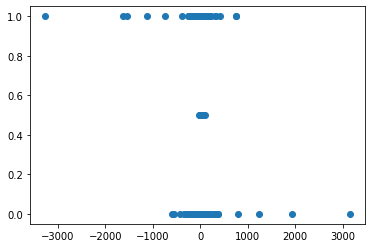

In [ ]:
plt.scatter(merged_df['qb_ratio'], merged_df['result1'])
plt.show

In [ ]:
#add result2 

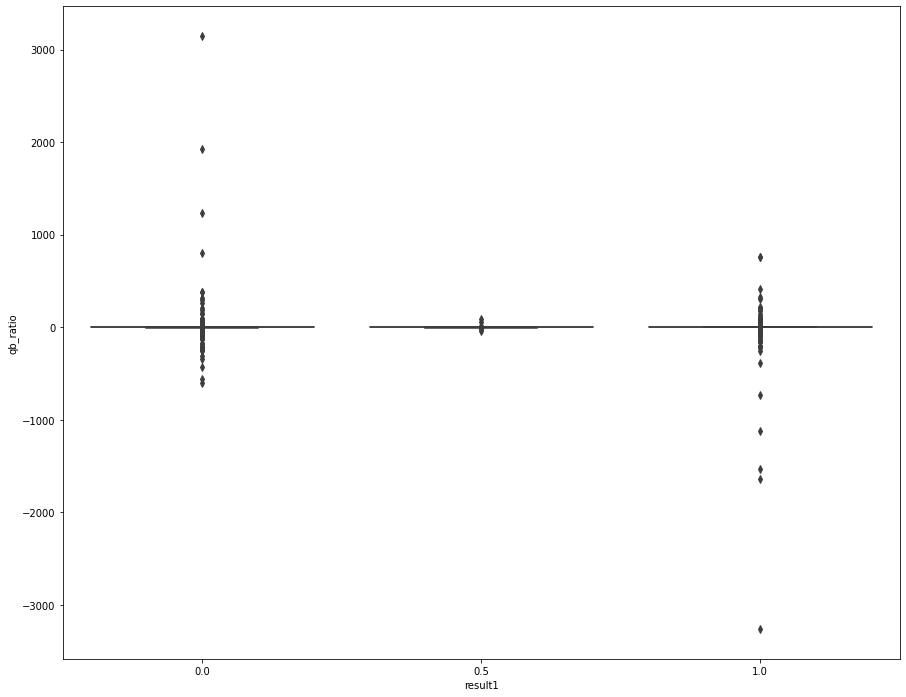

In [15]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 12))

ax = sns.boxplot(x='result1', y='qb_ratio', data=merged_df, ax=ax)

# show the graph

plt.show()